
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [1]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

## Delft, Netherlands

In [2]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 4 # 6 minutes hour of simulation
params.nP = 50 # reuqests (and passengers)
params.nV = 20 # vehicles



## Parameters for ExMAS

In [3]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [6]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

11-07-23 22:52:57-INFO-Initializing pairwise trip shareability between 50 and 50 trips.
11-07-23 22:52:57-INFO-creating combinations
11-07-23 22:52:57-INFO-2450	 nR*(nR-1)


KeyError: '[44851133] not in index'

In [5]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

11-07-23 22:52:22-INFO-Matching 50 trips to 50 rides in order to min u_veh
11-07-23 22:52:22-INFO-Problem solution: Optimal. 
Total costs for single trips:         13,018 
reduced by matching to:               13,018


In [48]:
inData.sblts.rides

indexes   u_pax  u_veh  kind               u_paxes         times  \
0      [0]  5.7440    310     1               [5.744]      [0, 310]   
1      [1]  6.7185    363     1   [6.718500000000001]     [75, 363]   
2      [2]  4.6880    253     1   [4.688000000000001]    [254, 253]   
3      [3]  9.2500    500     1                [9.25]    [305, 500]   
4      [4]  7.2655    392     1              [7.2655]   [1050, 392]   
5      [5]  9.2915    502     1   [9.291500000000001]   [1593, 502]   
6      [6]  6.9050    373     1               [6.905]   [1643, 373]   
7      [7]  1.4815     80     1              [1.4815]    [1730, 80]   
8      [8]  4.1270    223     1               [4.127]   [1860, 223]   
9      [9]  4.0990    221     1               [4.099]   [1977, 221]   
10    [10]  4.8035    259     1              [4.8035]   [2091, 259]   
11    [11]  2.8120    152     1               [2.812]   [2648, 152]   
12    [12]  6.1880    334     1   [6.188000000000001]   [3160, 334]   
13    [13]  2.4435    132     1  [2.4435000000000002]   [3194, 132]   
14    [14]  3.7400    202     1  [3.7399999999999998]   [3978, 202]   
15    [15]  3.3670    182     1               [3.367]   [4526, 182]   
16    [16]  2.8965    156     1  [2.8964999999999996]   [5212, 156]   
17    [17]  2.1905    118     1              [2.1905]   [5622, 118]   
18    [18]  5.5900    302     1                [5.59]   [5679, 302]   
19    [19]  5.9520    321     1               [5.952]   [6152, 321]   
20    [20]  2.7685    149     1              [2.7685]   [6218, 149]   
21    [21]  6.8295    369     1              [6.8295]   [6289, 369]   
22    [22]  3.9590    214     1               [3.959]   [6360, 214]   
23    [23]  1.9005    102     1              [1.9005]   [6703, 102]   
24    [24]  3.1740    171     1               [3.174]   [6857, 171]   
25    [25]  2.9320    158     1               [2.932]   [7242, 158]   
26    [26]  7.1315    385     1              [7.1315]   [7396, 385]   
27    [27]  4.1115    222     1  [4.1114999999999995]   [7420, 222]   
28    [28]  7.7620    419     1               [7.762]   [7456, 419]   
29    [29]  8.0350    434     1               [8.035]   [7651, 434]   
30    [30]  5.9260    320     1               [5.926]   [7692, 320]   
31    [31]  3.1770    171     1               [3.177]   [7881, 171]   
32    [32]  2.1660    117     1               [2.166]   [8415, 117]   
33    [33]  8.2880    448     1               [8.288]   [8627, 448]   
34    [34]  5.4480    294     1  [5.4479999999999995]   [8807, 294]   
35    [35]  3.5150    190     1               [3.515]   [9105, 190]   
36    [36]  3.9140    211     1               [3.914]   [9287, 211]   
37    [37]  7.3705    398     1              [7.3705]   [9379, 398]   
38    [38]  2.7195    147     1              [2.7195]   [9431, 147]   
39    [39]  2.2075    119     1              [2.2075]  [10098, 119]   
40    [40]  4.8745    263     1              [4.8745]  [10322, 263]   
41    [41]  8.8365    477     1              [8.8365]  [10614, 477]   
42    [42]  7.9500    429     1                [7.95]  [10706, 429]   
43    [43]  6.8510    370     1               [6.851]  [11123, 370]   
44    [44]  3.8430    207     1               [3.843]  [11384, 207]   
45    [45]  6.8710    371     1  [6.8709999999999996]  [11648, 371]   
46    [46]  2.3370    126     1  [2.3369999999999997]  [12100, 126]   
47    [47]  1.2980     70     1               [1.298]   [12209, 70]   
48    [48]  4.5740    247     1               [4.574]  [12685, 247]   
49    [49]  2.8735    155     1              [2.8735]  [13886, 155]   

   indexes_orig indexes_dest  
0           [0]          [0]  
1           [1]          [1]  
2           [2]          [2]  
3           [3]          [3]  
4           [4]          [4]  
5           [5]          [5]  
6           [6]          [6]  
7           [7]          [7]  
8           [8]          [8]  
9           [9]          [9]  
10         [10]         [10]  
11       

In [49]:
params.kpi = 1

In [50]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

#sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/veh{}.csv'.format(i))

11-07-23 22:00:42-INFO-Matching 50 trips to 50 rides in order to min u_veh
11-07-23 22:00:42-INFO-Problem solution: Optimal. 
Total costs for single trips:         13,128 
reduced by matching to:               13,128
0.5
11-07-23 22:00:44-CRITICAL-this is request 0 with [0] available rides.
11-07-23 22:00:44-CRITICAL-ride 0 available [1]
11-07-23 22:00:44-CRITICAL-this is reuqest 0 with [0] still available rides.
11-07-23 22:00:44-CRITICAL-vehicle 1 has 1 choices
0.5
11-07-23 22:00:44-CRITICAL-this is request 1 with [1] available rides.
11-07-23 22:00:44-CRITICAL-ride 1 available [1]
11-07-23 22:00:44-CRITICAL-this is reuqest 1 with [1] still available rides.
11-07-23 22:00:44-CRITICAL-vehicle 19 has 1 choices
0.5
11-07-23 22:00:44-CRITICAL-this is request 2 with [2] available rides.
11-07-23 22:00:44-CRITICAL-ride 2 available [1]
11-07-23 22:00:44-CRITICAL-this is reuqest 2 with [2] still available rides.
11-07-23 22:00:44-CRITICAL-vehicle 2 has 1 choices
0.5
11-07-23 22:00:44-CRITICA

In [ ]:
sim.vehs[1].rdf 

In [ ]:
pd.DataFrame(sim.vehs[1].myrides)

In [33]:
df = sim.res[0].veh_exp

indexes   u_pax u_veh kind               u_paxes         times  \
0      [0]  3.9405   213    1              [3.9405]      [0, 213]   
41    [41]  2.2490   121    1  [2.2489999999999997]   [4947, 121]   
44    [44]  4.3595   235    1              [4.3595]   [5359, 235]   
53    [53]  7.1715   387    1              [7.1715]   [7772, 387]   
83    [83]  9.9930   540    1               [9.993]  [12250, 540]   
93    [93]  2.3570   127    1               [2.357]  [13629, 127]   
97    [97]  4.0960   221    1               [4.096]  [14054, 221]   

   indexes_orig indexes_dest  degree  index  ...  \
0           [0]          [0]       1      0  ...   
41         [41]         [41]       1     41  ...   
44         [44]         [44]       1     44  ...   
53         [53]         [53]       1     53  ...   
83         [83]         [83]       1     83  ...   
93         [93]         [93]       1     93  ...   
97         [97]         [97]       1     97  ...   

                                         sim_schedule ttrav  dist    fare  \
0             node time  req_id    od
0          N...   213  2.13  3.1950   
41           node time  req_id    od
0         NaN...   121  1.21  1.8255   
44             node time  req_id    od
0          ...   235  2.35  3.5370   
53             node time  req_id    od
0          ...   387  3.87  5.8170   
83            node time  req_id    od
0          N...   540  5.40  8.1030   
93             node time  req_id    od
0          ...   127  1.27  1.9125   
97             node time  req_id    od
0          ...   221  2.21  3.3225   

   commission driver_revenue  pickup_dist  trav_dist  operating_cost  \
0      0.6390         2.5560         1378    1380.13         690.065   
41     0.3651         1.4604          608     609.21         304.605   
44     0.7074         2.8296         1369    1371.35         685.675   
53     1.1634         4.6536          842     845.87         422.935   
83     1.6206         6.4824         2024    2029.40        1014.700   
93     0.3825         1.5300          180     181.27          90.635   
97     0.6645         2.6580          721     723.21         361.605   

       profit  
0   -687.5090  
41  -303.1446  
44  -682.8454  
53  -418.2814  
83 -1008.2176  
93   -89.1050  
97  -358.9470  

[7 rows x 25 columns]

In [11]:
import seaborn as sns

In [12]:
df

nRIDES  nREJECTED    OUT  STARTS_DAY  OPENS_APP  RECEIVES_REQUEST  \
1      6.0        0.0  False           0          0            8951.0   
2      3.0        0.0  False           0          0           12984.0   
3      6.0        0.0  False           0          0           10913.0   
4      3.0        0.0  False           0          0           12281.0   
5      7.0        0.0  False           0          0           11091.0   
6      6.0        0.0  False           0          0           11406.0   
7      8.0        0.0  False           0          0           10747.0   
8      9.0        0.0  False           0          0           10432.0   
9      8.0        0.0  False           0          0            8435.0   
10     2.0        0.0  False           0          0           13862.0   
11     7.0        0.0  False           0          0           10652.0   
12     7.0        0.0  False           0          0           11384.0   
13     6.0        0.0  False           0          0            7726.0   
14     2.0        0.0  False           0          0           11857.0   
15     2.0        0.0  False           0          0            4568.0   
16     4.0        0.0  False           0          0            5597.0   
17     5.0        0.0  False           0          0           13014.0   
18     2.0        0.0  False           0          0            3796.0   
19     0.0        0.0  False           0          0               0.0   
20     7.0        0.0  False           0          0            9826.0   

    ACCEPTS_REQUEST  REJECTS_REQUEST  IS_ACCEPTED_BY_TRAVELLER  \
1              90.0                0                     117.0   
2              45.0                0                      60.0   
3              54.0                0                     170.0   
4              45.0                0                      60.0   
5              90.0                0                     307.0   
6              75.0                0                     131.0   
7              90.0                0                     418.0   
8             105.0                0                     221.0   
9              75.0                0                     337.0   
10             30.0                0                      30.0   
11             90.0                0                     175.0   
12            105.0                0                     125.0   
13             60.0                0                     220.0   
14             30.0                0                      26.0   
15             15.0                0                      93.0   
16             60.0                0                      79.0   
17             75.0                0                      81.0   
18             15.0                0                     162.0   
19              0.0                0                       0.0   
20            105.0                0                     140.0   

    IS_REJECTED_BY_TRAVELLER  ...  STARTS_REPOSITIONING  REPOSITIONED  \
1                          0  ...                     0             0   
2                          0  ...                     0             0   
3                          0  ...                     0             0   
4                          0  ...                     0             0   
5                          0  ...                     0             0   
6                          0  ...                     0             0   
7                          0  ...                     0             0   
8                          0  ...                     0             0   
9                          0  ...                     0             0   
10                         0  ...                     0             0   
11                         0  ...                     0             0   
12                         0  ...                     0             0   
13                         0  ...                     0             0   
14                         0  ...                     0      

In [26]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/ProfitMax.csv')

In [13]:
sim.res[0].veh_exp['REVENUE'].to_list()

KeyError: 'REVENUE'

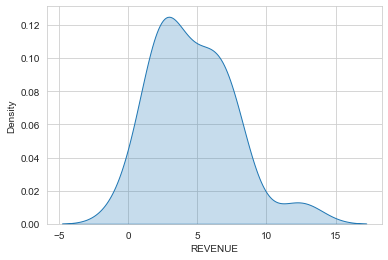

In [28]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.kdeplot(df.REVENUE, shade=True)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [29]:
sim.res[0].all_kpi # All driver revenue 

93.4653

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [17]:
params.kpi = 2

In [18]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate


11-07-23 21:48:49-WARNING-Setting up 4h simulation at 2023-07-11 19:46:18 for 20 vehicles and 100 passengers in Delft, Netherlands
0.5
11-07-23 21:48:50-CRITICAL-this is request 0 with [0] available rides.
11-07-23 21:48:50-CRITICAL-ride 0 available [1]
11-07-23 21:48:50-CRITICAL-this is reuqest 0 with [0] still available rides.
11-07-23 21:48:50-CRITICAL-vehicle 1 has 1 choices
0.5
11-07-23 21:48:50-CRITICAL-this is request 1 with [1, 101, 102] available rides.
11-07-23 21:48:50-CRITICAL-ride 1 available [1]
11-07-23 21:48:50-CRITICAL-ride 101 available [1, 0]
11-07-23 21:48:50-CRITICAL-ride 102 available [1, 0]
11-07-23 21:48:50-CRITICAL-this is reuqest 1 with [1, 101, 102] still available rides.
11-07-23 21:48:50-CRITICAL-vehicle 2 has 3 choices
0.5
11-07-23 21:48:50-CRITICAL-this is request 2 with [2, 102] available rides.
11-07-23 21:48:50-CRITICAL-ride 2 available [1]
11-07-23 21:48:50-CRITICAL-ride 102 not available [3, 1]
11-07-23 21:48:50-CRITICAL-this is reuqest 2 with [2] st

In [22]:
df = sim.res[0].veh_exp

In [26]:
sim.vehs[1].rdf

indexes   u_pax u_veh kind   u_paxes        times indexes_orig  \
0      [0]  3.9405   213    1  [3.9405]     [0, 213]          [0]   
42    [42]  1.1035    59    1  [1.1035]   [5221, 59]         [42]   
49    [49]  4.4320   239    1   [4.432]  [6615, 239]         [49]   
61    [61]  5.3295   288    1  [5.3295]  [8715, 288]         [61]   
67    [67]  1.7835    96    1  [1.7835]   [9797, 96]         [67]   
74    [74]  0.8185    44    1  [0.8185]  [10970, 44]         [74]   

   indexes_dest  degree  index  ...  \
0           [0]       1      0  ...   
42         [42]       1     42  ...   
49         [49]       1     49  ...   
61         [61]       1     61  ...   
67         [67]       1     67  ...   
74         [74]       1     74  ...   

                                         sim_schedule ttrav  dist    fare  \
0             node time  req_id    od
0          N...   213  2.13  3.1950   
42            node time  req_id    od
0          N...    59  0.59  0.8970   
49             node time  req_id    od
0          ...   239  2.39  3.5955   
61             node time  req_id    od
0          ...   288  2.88  4.3215   
67             node time  req_id    od
0          ...    96  0.96  1.4475   
74             node time  req_id    od
0          ...    44  0.44  0.6645   

   commission driver_revenue  pickup_dist  trav_dist  operating_cost  \
0      0.6390         2.5560         1378    1380.13         690.065   
42     0.1794         0.7176           34      34.59          17.295   
49     0.7191         2.8764          962     964.39         482.195   
61     0.8643         3.4572         2403    2405.88        1202.940   
67     0.2895         1.1580           31      31.96          15.980   
74     0.1329         0.5316          609     609.44         304.720   

       profit  
0   -687.5090  
42   -16.5774  
49  -479.3186  
61 -1199.4828  
67   -14.8220  
74  -304.1884  

[6 rows x 25 columns]

In [27]:
pd.DataFrame(sim.vehs[1].myrides)

veh           pos      t                      event   paxes
0     1  4.482157e+07      0                 STARTS_DAY      []
1     1  4.482157e+07      0                  OPENS_APP      []
2     1  4.482157e+07      0           RECEIVES_REQUEST      []
3     1  4.482157e+07     15            ACCEPTS_REQUEST      []
4     1  4.482157e+07     35   IS_ACCEPTED_BY_TRAVELLER  [None]
5     1  4.485959e+07    154          ARRIVES_AT_PICKUP      []
6     1  4.485959e+07    154  MEETS_TRAVELLER_AT_PICKUP      []
7     1  4.485959e+07    184        DEPARTS_FROM_PICKUP     [0]
8     1  6.435865e+08    397         ARRIVES_AT_DROPOFF     [0]
9     1  6.435865e+08   5221           RECEIVES_REQUEST      []
10    1  6.435865e+08   5236            ACCEPTS_REQUEST      []
11    1  6.435865e+08   5256   IS_ACCEPTED_BY_TRAVELLER  [None]
12    1  6.435865e+08   5293          ARRIVES_AT_PICKUP      []
13    1  6.435865e+08   5293  MEETS_TRAVELLER_AT_PICKUP      []
14    1  6.435865e+08   5323        DEPARTS_FROM_PICKUP    [42]
15    1  4.481310e+07   5382         ARRIVES_AT_DROPOFF    [42]
16    1  4.481310e+07   6615           RECEIVES_REQUEST      []
17    1  4.481310e+07   6630            ACCEPTS_REQUEST      []
18    1  4.481310e+07   6650   IS_ACCEPTED_BY_TRAVELLER  [None]
19    1  3.452839e+09   6745          ARRIVES_AT_PICKUP      []
20    1  3.452839e+09   6745  MEETS_TRAVELLER_AT_PICKUP      []
21    1  3.452839e+09   6775        DEPARTS_FROM_PICKUP    [49]
22    1  4.473683e+07   7014         ARRIVES_AT_DROPOFF    [49]
23    1  4.473683e+07   8715           RECEIVES_REQUEST      []
24    1  4.473683e+07   8730            ACCEPTS_REQUEST      []
25    1  4.473683e+07   8750   IS_ACCEPTED_BY_TRAVELLER  [None]
26    1  1.584596e+09   8983          ARRIVES_AT_PICKUP      []
27    1  1.584596e+09   8983  MEETS_TRAVELLER_AT_PICKUP      []
28    1  1.584596e+09   9013        DEPARTS_FROM_PICKUP    [61]
29    1  6.208344e+08   9301         ARRIVES_AT_DROPOFF    [61]
30    1  6.208344e+08   9797           RECEIVES_REQUEST      []
31    1  6.208344e+08   9812            ACCEPTS_REQUEST      []
32    1  1.448536e+09   9815          ARRIVES_AT_PICKUP      []
33    1  1.448536e+09   9832   IS_ACCEPTED_BY_TRAVELLER  [None]
34    1  1.448536e+09   9832  MEETS_TRAVELLER_AT_PICKUP      []
35    1  1.448536e+09   9862        DEPARTS_FROM_PICKUP    [67]
36    1  4.482706e+07   9958         ARRIVES_AT_DROPOFF    [67]
37    1  4.482706e+07  10970           RECEIVES_REQUEST      []
38    1  4.482706e+07  10985            ACCEPTS_REQUEST      []
39    1  4.482706e+07  11005   IS_ACCEPTED_BY_TRAVELLER  [None]
40    1  2.598005e+09  11046          ARRIVES_AT_PICKUP      []
41    1  2.598005e+09  11046  MEETS_TRAVELLER_AT_PICKUP      []
42    1  2.598005e+09  11076        DEPARTS_FROM_PICKUP    [74]
43    1  4.482157e+07  11120         ARRIVES_AT_DROPOFF    [74]
44    1  4.482157e+07  21599                 ENDS_SHIFT      []

In [16]:
df

nRIDES  nREJECTED    OUT  STARTS_DAY  OPENS_APP  RECEIVES_REQUEST  \
1      6.0        0.0  False           0          0            8951.0   
2      3.0        0.0  False           0          0           12984.0   
3      6.0        0.0  False           0          0           10913.0   
4      3.0        0.0  False           0          0           12281.0   
5      7.0        0.0  False           0          0           11091.0   
6      6.0        0.0  False           0          0           11406.0   
7      8.0        0.0  False           0          0           10747.0   
8      9.0        0.0  False           0          0           10432.0   
9      8.0        0.0  False           0          0            8435.0   
10     2.0        0.0  False           0          0           13862.0   
11     7.0        0.0  False           0          0           10652.0   
12     7.0        0.0  False           0          0           11384.0   
13     6.0        0.0  False           0          0            7726.0   
14     2.0        0.0  False           0          0           11857.0   
15     2.0        0.0  False           0          0            4568.0   
16     4.0        0.0  False           0          0            5597.0   
17     5.0        0.0  False           0          0           13014.0   
18     2.0        0.0  False           0          0            3796.0   
19     0.0        0.0  False           0          0               0.0   
20     7.0        0.0  False           0          0            9826.0   

    ACCEPTS_REQUEST  REJECTS_REQUEST  IS_ACCEPTED_BY_TRAVELLER  \
1              90.0                0                     117.0   
2              45.0                0                      60.0   
3              54.0                0                     170.0   
4              45.0                0                      60.0   
5              90.0                0                     307.0   
6              75.0                0                     131.0   
7              90.0                0                     418.0   
8             105.0                0                     221.0   
9              75.0                0                     337.0   
10             30.0                0                      30.0   
11             90.0                0                     175.0   
12            105.0                0                     125.0   
13             60.0                0                     220.0   
14             30.0                0                      26.0   
15             15.0                0                      93.0   
16             60.0                0                      79.0   
17             75.0                0                      81.0   
18             15.0                0                     162.0   
19              0.0                0                       0.0   
20            105.0                0                     140.0   

    IS_REJECTED_BY_TRAVELLER  ...  STARTS_REPOSITIONING  REPOSITIONED  \
1                          0  ...                     0             0   
2                          0  ...                     0             0   
3                          0  ...                     0             0   
4                          0  ...                     0             0   
5                          0  ...                     0             0   
6                          0  ...                     0             0   
7                          0  ...                     0             0   
8                          0  ...                     0             0   
9                          0  ...                     0             0   
10                         0  ...                     0             0   
11                         0  ...                     0             0   
12                         0  ...                     0             0   
13                         0  ...                     0             0   
14                         0  ...                     0      

In [34]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PooledRide.csv')

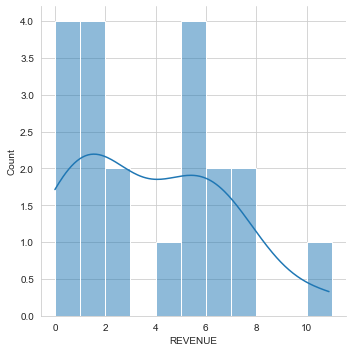

In [35]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [36]:
sim.res[0].veh_exp['REVENUE'].to_list()

[6.1371,
 0.35039999999999993,
 2.4936,
 0.672,
 1.1736,
 5.22,
 4.4388000000000005,
 10.8891,
 1.9451999999999998,
 7.544700000000001,
 2.1803999999999997,
 0.0,
 7.630199999999999,
 5.886,
 1.4940000000000002,
 5.2956,
 5.103,
 6.7908,
 0.0,
 1.9008000000000003]

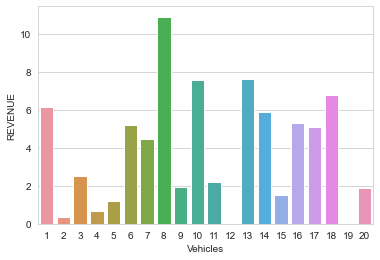

In [37]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [38]:
sim.res[0].all_kpi # All driver revenue 

77.1453

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [39]:
params.kpi = 3

In [40]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

03-04-23 10:58:30-WARNING-Setting up 1h simulation at 2023-04-03 10:19:29 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
0.5
03-04-23 10:58:32-CRITICAL-this is request 1 with [1, 532, 741, 789, 1572, 1757, 2291, 3011, 3351, 3352, 3353, 4879, 4880, 4881] available rides.
03-04-23 10:58:32-CRITICAL-ride 1 available [1]
03-04-23 10:58:32-CRITICAL-ride 532 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 741 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 789 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 1572 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 1757 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 2291 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3011 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3351 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3352 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3353 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 4879 available [1, 0, 0]
03-04-23 10:58:32-CRITICAL-ride 4880 available [1, 0, 0]
03-04-23 10:58:3

In [41]:
df = sim.res[0].veh_exp

In [42]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PrivateRide.csv')

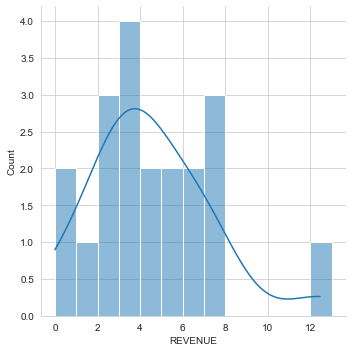

In [43]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [44]:
sim.res[0].veh_exp['REVENUE'].to_list()

[4.1643,
 12.447000000000003,
 3.8016000000000005,
 2.4888,
 7.630199999999999,
 0.672,
 7.544700000000001,
 3.4968000000000004,
 7.145099999999999,
 4.2084,
 6.012,
 3.4668,
 6.1371,
 5.370300000000001,
 1.86,
 2.886,
 5.103,
 3.4188,
 2.4936,
 0.0]

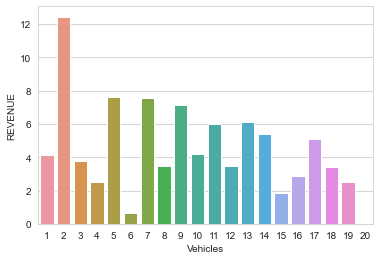

In [45]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [90]:
sim.res[0].all_kpi # All driver revenue 

79.08059999999999

# All in one Simulation  

In [8]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/Driver/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/Driver/pax{}.csv'.format(i))
    #driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)['Vehicles'] = sim.res[0].veh_exp.index
    #sim.res[0].veh_exp['ds'] = f"{i}"
    
    #responses.append(sim.res[0].veh_exp)
     
   # vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    #no_of_veh = len(vehicles)
    
    #avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    #idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    
    #_inData.sblts.rides['commission'] = _inData.sblts.rides.apply(lambda row: row.fare*sp.comm_rate, axis=1)
    

21-06-23 12:24:06-INFO-Matching 100 trips to 160 rides in order to min u_veh
21-06-23 12:24:06-INFO-Problem solution: Optimal. 
Total costs for single trips:         26,756 
reduced by matching to:               24,500
0.5
0.5
0.5
0.5
0.5
0.5
21-06-23 12:24:07-CRITICAL-this is request 5 with [5, 137] available rides.
21-06-23 12:24:07-CRITICAL-ride 5 available [1]
21-06-23 12:24:07-CRITICAL-ride 137 available [1, 0]
21-06-23 12:24:07-CRITICAL-this is reuqest 5 with [5, 137] still available rides.
Profit Maximization
21-06-23 12:24:07-CRITICAL-vehicle 6 has 2 choices
0.5
21-06-23 12:24:07-CRITICAL-this is request 6 with [6, 100, 137] available rides.
21-06-23 12:24:07-CRITICAL-ride 6 available [1]
21-06-23 12:24:07-CRITICAL-ride 100 available [1, 0]
21-06-23 12:24:07-CRITICAL-ride 137 not available [7, 1]
21-06-23 12:24:07-CRITICAL-this is reuqest 6 with [6, 100] still available rides.
Profit Maximization
21-06-23 12:24:07-CRITICAL-vehicle 5 has 2 choices
0.5
21-06-23 12:24:07-CRITICAL-

# Performance Parameters for Driver

In [ ]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

In [ ]:
driver_data

In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [ ]:
print('\nCSV String:\n', csv_data)